In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output
import time

class Environment:
    """Escape Room Environment, Actions: press (0), left (1), right(2) """

    def __init__(self):
        self.pos = np.random.randint(10)
        self.door_open = 0

        self.switch = 5
        self.door = 9
        
    def get_state(self):
        return (self.pos, self.door_open)
    
    def is_done(self):
        return self.pos == self.door and self.door_open == 1
    
    def take_action(self, a):
        if a == 0:
            if self.pos == self.switch:
                self.door_open = 1
        if a == 1:
            self.pos = max(0, self.pos - 1)
        elif a == 2:
            self.pos = min(9, self.pos + 1)

        r = -1

        if self.pos == self.door and self.door_open:
            r = 1
            
        return r

    def draw(self):
        s = [' '] * 10
        
        s[self.switch] = "㊙️"
        s[self.pos] = "🤖"
        
        if self.door_open == 1:
            s[self.door] = "🚪"
            
        return ''.join(s)

In [2]:
class Agent:
    """ Agent with eps-greedy policy """
    
    def __init__(self, eps):
        self.eps = eps
    
    def pick_action(self, s, Q):
        if np.random.uniform() <= self.eps:
            return np.random.randint(Q.shape[-1])
        else:
            return np.argmax(Q[s])

In [3]:
Q = np.random.uniform(size=(10, 2, 3))
Q_last = Q.copy()

lr = 0.1
n_episodes = 10000
gamma = 0.9

deltas = []
steps = []

In [4]:
""" Q learning algorithm """

for i in range(n_episodes):
    
    env = Environment()
    ag = Agent(0.5 * (n_episodes - i) / n_episodes)
    
    step = 0
    
    while not env.is_done():
        s = env.get_state()
        a = ag.pick_action(s, Q)
        r = env.take_action(a)
        
        s_new = env.get_state()

        Q[s][a] = Q[s][a] + lr * (r + gamma * np.max(Q[s_new]) - Q[s][a])
        
        step += 1
        
    steps.append(step)
    deltas.append(np.linalg.norm(Q-Q_last))
    Q_last = Q.copy()

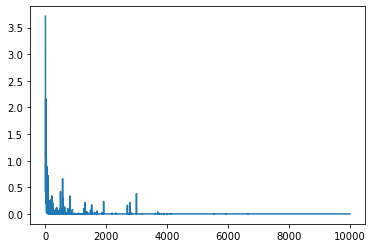

In [5]:
""" Visualize convergence of Q w.r.t. Frobenius norm """

plt.plot(deltas)

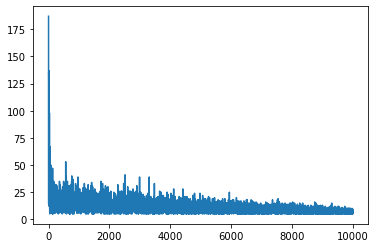

In [6]:
""" Number of time steps needed by agent to escape. """

plt.plot(steps)

In [7]:
steps[-10:]

[6, 9, 6, 5, 7, 5, 6, 8, 6, 7]

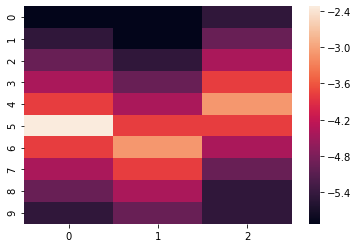

In [8]:
""" Learned Q (door closed) """

sns.heatmap(Q[:,0,:])

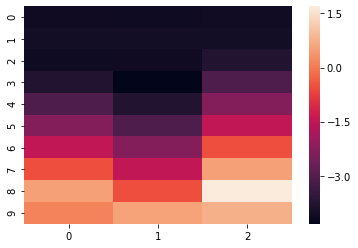

In [9]:
""" Learned Q (door open) """

sns.heatmap(Q[:,1,:])

In [10]:
""" Apply learned policy to escape room environment (no learning) """

for i in range(10):
    
    env = Environment()
    ag = Agent(0)
    
    while not env.is_done():
        s = env.get_state()
        a = ag.pick_action(s, Q)
        r = env.take_action(a)
        
        clear_output(wait=True)
        time.sleep(0.3)
        
        print(f"Episode: {i}")
        print(f"State:   {env.draw()}")
        print(f"Action:  {['press', 'left', 'right'][a]}")
        
    time.sleep(0.5)

Episode: 9
State:        ㊙️   🚪
Action:  right
